In [ ]:
# FATHIMA IRFANA N P
# ROLL NO :30

# AIM =
# Q)Write a Python Program to Predict CO2
# Emission using a Multiple Linear Regression Model with the
# dataset fuelconsumption.csv
# Predict CO2 emission for a vehicle with Engine size=2, cylinders=2 and fuel consumption in city=8.1

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/FuelConsumption.csv')
df.head()
df.info


<bound method DataFrame.info of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0             AS5        Z                   9.9                  6.7   
1              M6        Z                  11.2                  7.7   
2             AV7        Z                   6.0                  5.8   
3             AS6        Z                  12.7                  9.1   
4             AS6        Z                  12.1                  8.7   
...           ...      ...                   ...                  ...   
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                      8.5                        33           196  
1                      9.6                        29           221  
2                      5.9                        48           136  
3                     11.1                        25           255  
4                     10.6                        27           244  
...                    ...                       ...           ...  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294  

[1067 rows x 13 columns]>

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
#lets select features that we want to use for regression.
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [ ]:
#Extracting independent and dependent Variable
x= cdf.iloc[:, :-1].values
y= cdf.iloc[:, -1].values
print(x)
print(y)

[[ 2.   4.   9.9  6.7  8.5]
 [ 2.4  4.  11.2  7.7  9.6]
 [ 1.5  4.   6.   5.8  5.9]
 ...
 [ 3.   6.  13.4  9.8 11.8]
 [ 3.2  6.  12.9  9.3 11.3]
 [ 3.2  6.  14.9 10.2 12.8]]
[196 221 136 ... 271 260 294]


In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

In [ ]:
#Fitting the MLR model to the training set:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
#finding regression coefficients
print('Coefficients: ', regressor.coef_)
print(regressor.intercept_)

Coefficients:  [ 10.8547316    7.65914224 -11.21595269 -10.47231908  31.14100197]
64.88135054065862


In [ ]:
#predicting the Test set result:
y_pred= regressor.predict(x_test)
#predicting the Training set result:
x_pred= regressor.predict(x_train)

In [ ]:
print('Residual sum squares: %.2f' % np.mean((y_pred - y_test) ** 2 ))

Residual sum squares: 617.32


In [ ]:
#Return the coefficient of determination of the prediction.
#The coefficient of determination $R^{2}$ is defined as $(1 - u/v)$where '$u$' is the residual sum of squares $((y\_true - y\_pred)** 2)sum().
print(regressor.score(x_test, y_test))

0.8426468641660052


<Axes: >

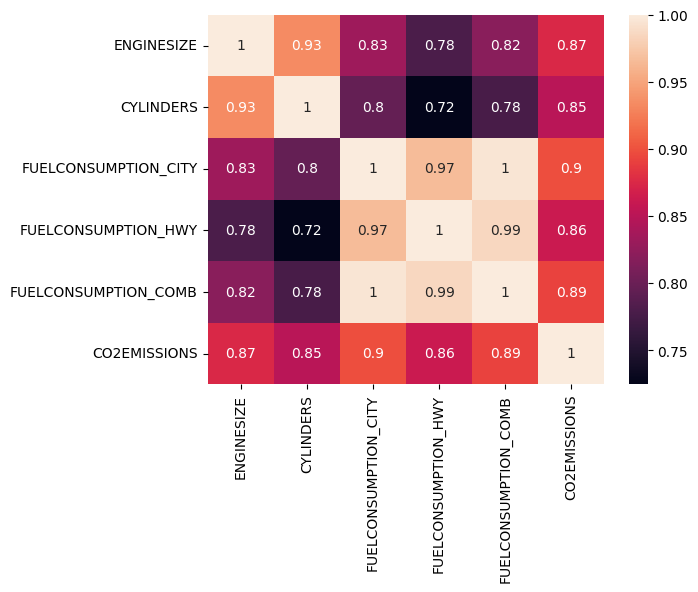

In [ ]:
#check the correlation between dependent variables and independent variables
import seaborn as sns
sns.heatmap(cdf.corr(), annot=True)


<Axes: >

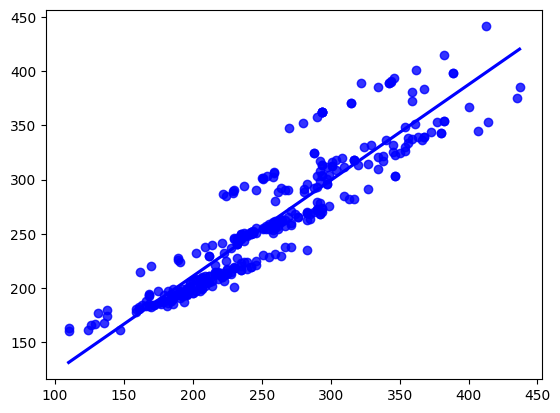

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

/tmp/ipython-input-543185655.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/tmp/ipython-input-543185655.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax

<Axes: ylabel='Density'>

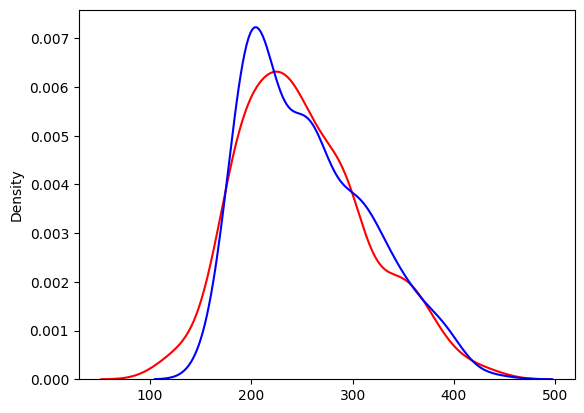

In [ ]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [ ]:
#Extracting independent and dependent Variable
x= cdf.iloc[:, :-1].values
y= cdf.iloc[:, -1].values
print(x)
print(y)

[[ 2.   4.   9.9  6.7  8.5]
 [ 2.4  4.  11.2  7.7  9.6]
 [ 1.5  4.   6.   5.8  5.9]
 ...
 [ 3.   6.  13.4  9.8 11.8]
 [ 3.2  6.  12.9  9.3 11.3]
 [ 3.2  6.  14.9 10.2 12.8]]
[196 221 136 ... 271 260 294]


In [ ]:
#Fitting the MLR model to the training set:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=1/3, random_state=0)

In [ ]:
y_pred= regressor.predict(x_test)

In [ ]:
print(regressor.score(x_test, y_test))

0.8426468641660052
